In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import plotly.express as px
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
design_space = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv"
df = pd.read_csv(design_space)
ref = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpaceOriginal.csv"
df_ref = pd.read_csv(ref)

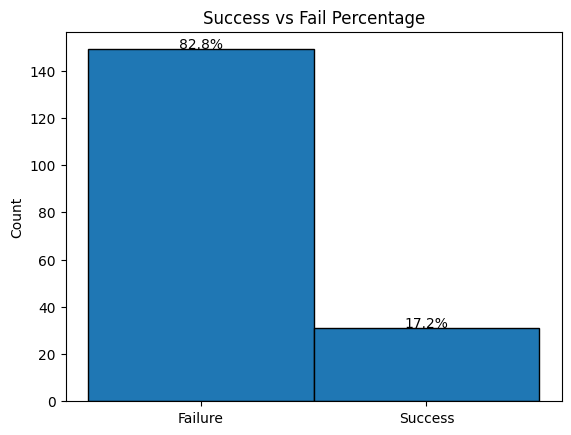

In [3]:

# Calculate counts and percentages
counts = df['DesignLabel'].value_counts()
percentages = counts / counts.sum() * 100

# Plot histogram with bins for 0 and 1
plt.hist(df['DesignLabel'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['Failure', 'Success'])  # Custom labels
plt.ylabel('Count')
plt.title('Success vs Fail Percentage')

# Annotate bars with percentages
for i, pct in zip([0, 1], percentages.sort_index()):
    plt.text(i, counts[i] + 0.2, f'{pct:.1f}%', ha='center', fontsize=10)

plt.show()


# NUS

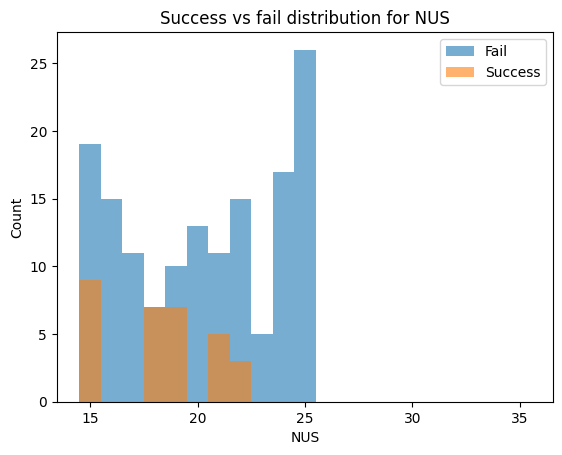

In [4]:
plt.hist(df[df['DesignLabel']==0]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Fail')
plt.hist(df[df['DesignLabel']==1]['NUS'], bins=[14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5], alpha=0.6, label='Success')
plt.legend()
plt.xlabel('NUS')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

# SW

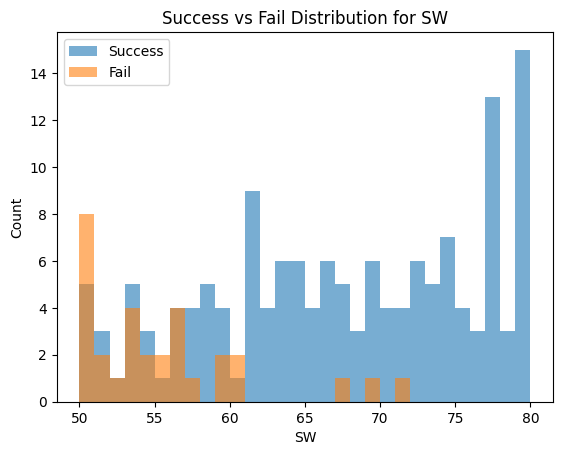

In [5]:
# Define 30 bins between 0.05 and 0.18
bins = np.linspace(50, 80, 31)

# Plot histograms for Label=1 and Label=0 using the specified bins
plt.hist(df[df['DesignLabel'] == 0]['SW'], bins=bins, alpha=0.6, label='Success')
plt.hist(df[df['DesignLabel'] == 1]['SW'], bins=bins, alpha=0.6, label='Fail')

# Add labels and title
plt.legend()
plt.xlabel('SW')
plt.ylabel('Count')
plt.title('Success vs Fail Distribution for SW')

# Show the plot
plt.show()


# ST

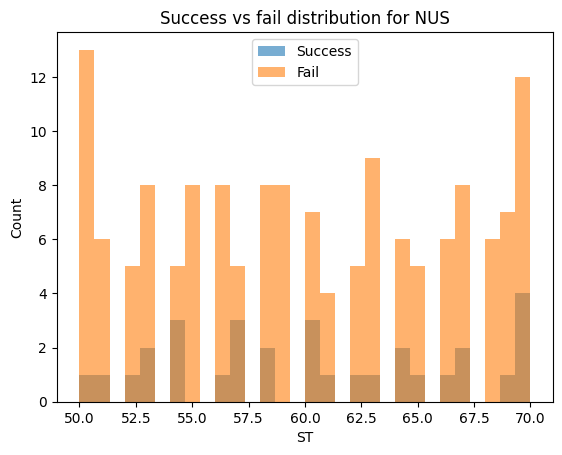

In [6]:
plt.hist(df[df['DesignLabel']==1]['ST'], bins=30, alpha=0.6, label='Success')
plt.hist(df[df['DesignLabel']==0]['ST'], bins=30, alpha=0.6, label='Fail')
plt.legend()
plt.xlabel('ST')
plt.ylabel('Count')
plt.title('Success vs fail distribution for NUS')
plt.show()

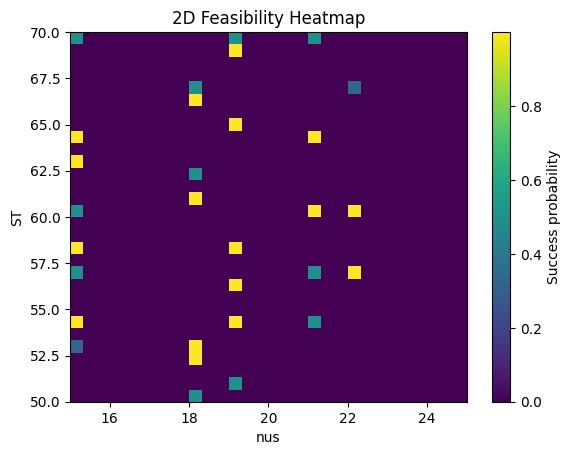

In [7]:
import numpy as np

# Extract variables
x = df['NUS']
y = df['ST']
z = df['DesignLabel']  # 0/1

# Create 2D bins
bins = 30
heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
counts, _, _ = np.histogram2d(x, y, bins=bins)

# Avoid division by zero
prob = heatmap / (counts + 1e-9)

plt.imshow(prob.T, origin='lower', cmap='viridis',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto')
plt.colorbar(label='Success probability')
plt.xlabel('nus')
plt.ylabel('ST')
plt.title('2D Feasibility Heatmap')
plt.show()


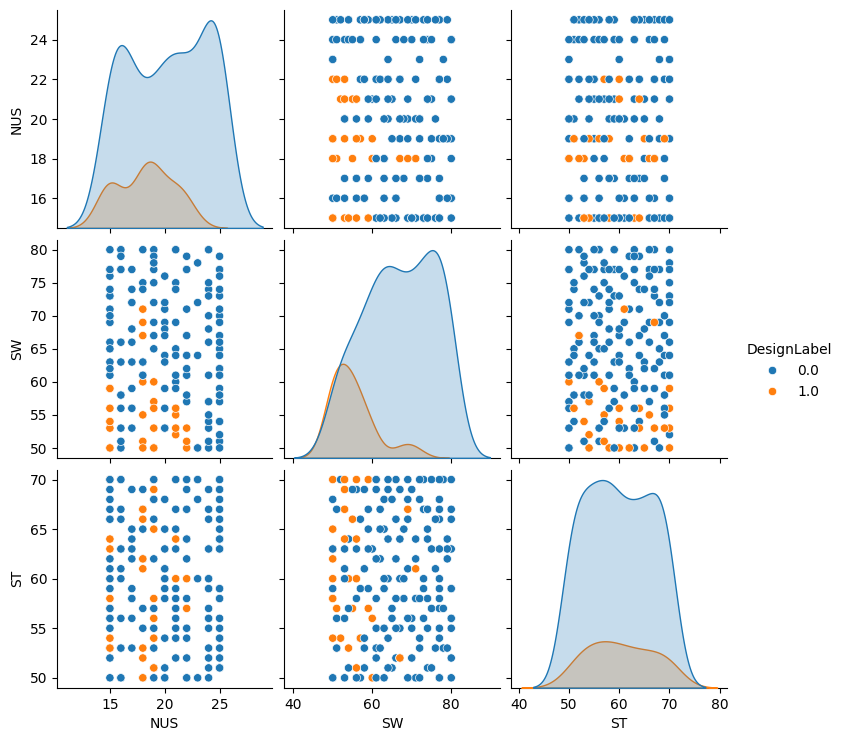

In [8]:
sns.pairplot(df, hue='DesignLabel', vars=['NUS','SW','ST'])
plt.show()


## Pairwise plots

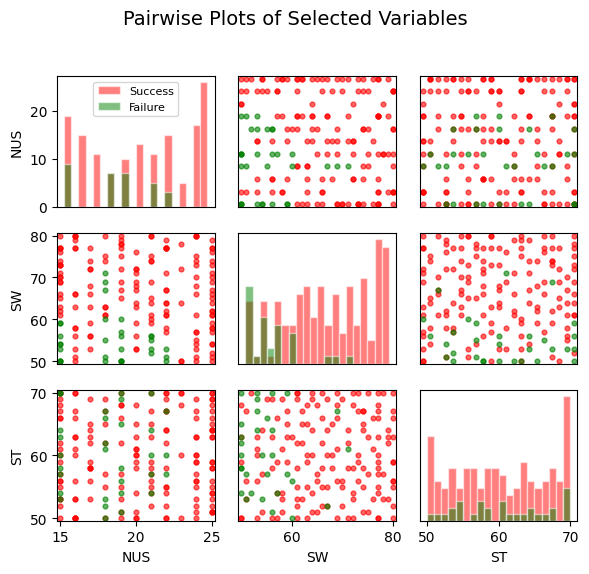

In [9]:

cols_to_plot = ['NUS', 'SW', 'ST']   # only these columns

# --- Load CSV ---

# Ensure required columns exist
required = set(cols_to_plot + ['DesignLabel'])
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing columns in CSV: {missing}\nAvailable: {list(df.columns)}")

# Keep only the columns we need (for safety and order)
df = df[cols_to_plot + ['DesignLabel']].copy()

# Coerce to numeric to avoid plotting issues; invalid entries become NaN
for c in cols_to_plot:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Split by label
df0 = df[df['DesignLabel'] == 0]
df1 = df[df['DesignLabel'] == 1]

# Convert to numpy arrays for speed
X0 = df0[cols_to_plot].to_numpy()
X1 = df1[cols_to_plot].to_numpy()

var_names = cols_to_plot
n = len(var_names)

# --- Build pairwise plot ---
fig, axes = plt.subplots(n, n, figsize=(min(2*n, 20), min(2*n, 20)))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]

        if i == j:
            # Diagonal: overlay histograms for Label 0 (red) and Label 1 (blue)
            vals0 = X0[:, i]
            vals1 = X1[:, i]
            vals0 = vals0[~np.isnan(vals0)]
            vals1 = vals1[~np.isnan(vals1)]

            # Use common bins based on combined data for fair comparison
            combined = np.concatenate([vals0, vals1])
            if combined.size == 0:
                bins = 10
            else:
                bins = np.histogram_bin_edges(combined, bins=20)

            ax.hist(vals0, bins=bins, color='red', alpha=0.5, edgecolor='white', label='Success')
            ax.hist(vals1, bins=bins, color='green', alpha=0.5, edgecolor='white', label='Failure')

            # Legend only on diagonal plots (top row to reduce clutter)
            if i == 0:
                ax.legend(fontsize=8)

        else:
            # Off-diagonal: scatter j vs i for both labels
            x0 = X0[:, j]; y0 = X0[:, i]
            x1 = X1[:, j]; y1 = X1[:, i]

            mask0 = ~np.isnan(x0) & ~np.isnan(y0)
            mask1 = ~np.isnan(x1) & ~np.isnan(y1)

            ax.scatter(x0[mask0], y0[mask0], color='red', s=12, alpha=0.6, label='0')
            ax.scatter(x1[mask1], y1[mask1], color='green', s=12, alpha=0.6, label='1')

            # Compute axis limits with small padding using combined valid data
            def pad_limits_arr(a, b):
                a = a[~np.isnan(a)]; b = b[~np.isnan(b)]
                combined = np.concatenate([a, b])
                if combined.size == 0:
                    return (0, 1)
                mn, mx = np.min(combined), np.max(combined)
                pad = 0.02 * (mx - mn if mx > mn else 1.0)
                return (mn - pad, mx + pad)

            ax.set_xlim(*pad_limits_arr(x0, x1))
            ax.set_ylim(*pad_limits_arr(y0, y1))

        # Axis labels only on left column and bottom row
        if j == 0:
            ax.set_ylabel(var_names[i])
        else:
            ax.set_yticks([])

        if i == n - 1:
            ax.set_xlabel(var_names[j])
        else:
            ax.set_xticks([])

fig.suptitle('Pairwise Plots of Selected Variables', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#fig.savefig(output_png, dpi=200, bbox_inches='tight')
#plt.close(fig)

# Final Design space

In [10]:

design_space = r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv"
df = pd.read_csv(design_space)
# === Choose columns ===
x_col = "NUS"
y_col = "SW"
z_col = "ST"
label = "DesignLabel"  # this is the binary label (1.0 or 0.0)

# --- Ensure columns exist (optional but safer) ---
required_cols = [x_col, y_col, z_col, label]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in CSV: {missing}")

# === Prepare data for plotting ===
# Keep only relevant columns and drop rows with NaNs in these columns
df_plot = df[required_cols].dropna(subset=required_cols)

# Treat label as discrete categories: "0.0" and "1.0"
# (this forces Plotly to use discrete colors instead of a continuous gradient)
df_plot["LabelCat"] = df_plot[label].astype(str)

# Optional: clean up legend labels
label_names = {"0.0": "Failure", "1.0": "Success"}

# Define consistent colors for each category
color_map = {
    "0.0": "#d62728",  # red
    "1.0": "#2ca02c",  # green
}

# === Create interactive 3D scatter ===
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color="LabelCat",
    opacity=0.8,
    height=700,
    hover_data={label: True, "LabelCat": False},  # show original numeric label in hover
)

# Update marker size
fig.update_traces(marker=dict(size=4))

# Apply discrete color map and nicer legend titles
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text="DesignLabel",
)

# Apply legend names and color map
fig.for_each_trace(
    lambda t: t.update(name=label_names.get(t.name, t.name))
)
fig.update_traces(marker=dict(color=None))  # let color_discrete_map control colors
fig.update_layout(
    coloraxis_showscale=False
)
fig.update_traces(
    marker=dict(line=dict(width=0))
)
fig.update_layout(
    legend=dict(itemsizing="constant")
)

# Plotly Express accepts color_discrete_map via constructor (alternative: rebuild fig)
# Rebuild fig with the discrete map for guaranteed application:
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color="LabelCat",
    opacity=0.8,
    height=700,
    color_discrete_map=color_map,
    hover_data={label: True, "LabelCat": False},
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text="DesignLabel",
)
fig.for_each_trace(lambda t: t.update(name=label_names.get(t.name, t.name)))

# === Save as a standalone HTML file ===
fig.write_html(r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.html", include_plotlyjs="cdn")



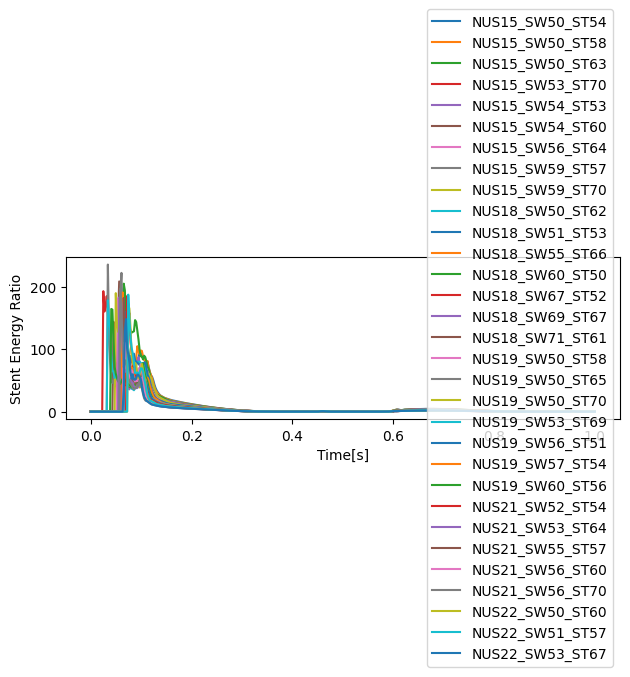

In [11]:

directory_path = r"C:\Users\z5713258\SVMG_MasterThesis\FEA\CylExpansion\Results"
nus_folders = [name for name in os.listdir(directory_path)
               if os.path.isdir(os.path.join(directory_path, name)) and name.startswith("NUS")]
i = 0
for folder in nus_folders:
    os.chdir(os.path.join(directory_path, folder))
    file_path = os.path.join(directory_path, folder, "StentEnergyRatio.csv")
    if os.path.isfile(file_path):
        df = pd.read_csv("StentEnergyRatio.csv",sep=r"\s+")
        df.columns = df.columns.str.strip()  # remove whitespace in headers

        # Grab first (X) and second (Y) columns by position
        x_raw = df.iloc[:, 0]
        
        # Convert to numeric (coerce bad values to NaN)
        x = pd.to_numeric(x_raw, errors='coerce')
        plt.plot(df['X'],df['StentEnergyRatio'], label=folder)

        i+=1
        
plt.xlabel('Time[s]')
plt.ylabel('Stent Energy Ratio')

plt.legend(loc='right')
plt.tight_layout()
plt.show()

# Radial recoil

In [15]:
df1 = df[df['DesignLabel'] == 1]

df1_plot = df1.assign(Source='DesignLabel=1')
df_ref_plot = df_ref.assign(Source='Reference')

# Combine
df_all = pd.concat([df1_plot, df_ref_plot], ignore_index=True)

In [16]:
def plot_scatter_2d (design_variable = 'NUS', optimisation_function = 'RadialRecoil'):
    baseline_rr = df_ref[optimisation_function].iloc[0]  
    # Masks for df1 based on baseline
    below = df1[optimisation_function] <= baseline_rr
    above = df1[optimisation_function] > baseline_rr

    # Create figure
    plt.figure(figsize=(4, 4))

    # df1 below baseline (green)
    plt.scatter(
        df1.loc[below, design_variable],
        df1.loc[below, optimisation_function],
        color='green',
        s=50,
        label=f'{optimisation_function} < {baseline_rr}'
    )

    # df1 above baseline (red)
    plt.scatter(
        df1.loc[above, design_variable],
        df1.loc[above, optimisation_function],
        color='red',
        s=50,
        label=f'{optimisation_function} > {baseline_rr}'
    )

    # Reference points (black stars)
    plt.scatter(
        df_ref[design_variable],
        df_ref[optimisation_function],
        color='black',
        marker='*',
        s=120,
        label='Reference'
    )

    # Dashed horizontal line at baseline RR
    plt.axhline(
        y=baseline_rr,
        color='black',
        linestyle='--',
        linewidth=1.0
        #label=f'Reference RR = {baseline_rr:.3f}'
    )

    # Labels, legend, grid
    plt.xlabel(design_variable)
    plt.ylabel(optimisation_function)
    plt.title(f'{design_variable} vs {optimisation_function}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()


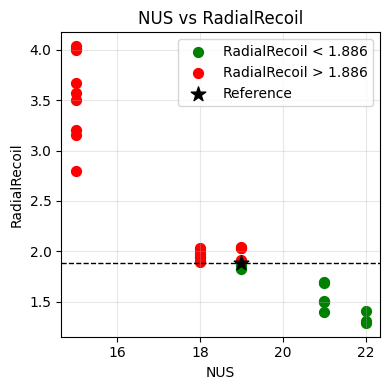

In [17]:
plot_scatter_2d('NUS', 'RadialRecoil')

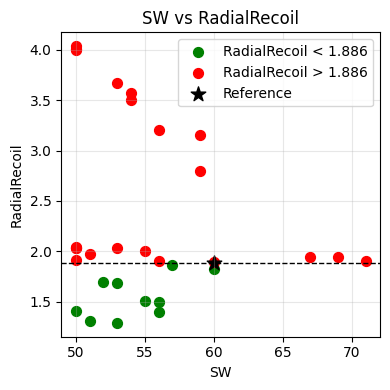

In [18]:
plot_scatter_2d ('SW', 'RadialRecoil')

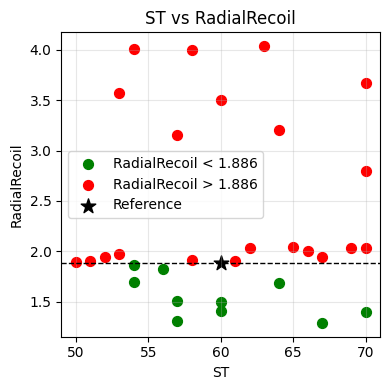

In [19]:
plot_scatter_2d ('ST', 'RadialRecoil')

In [20]:


px.scatter_3d(
    df_all,
    x='ST',
    y='NUS',
    z='RadialRecoil',
    color = 'Source',
    labels={'NUS': 'NUS', 'ST': 'ST', 'RadialRecoil': 'Radial Recoil'},
    title='',
    width =500,
    height = 500
)


In [21]:
def plot_scatter_3d (design_variables = ['NUS','SW'], optimisation_function = 'RadialRecoil'):
    baseline_rr = df_ref[optimisation_function].iloc[0]  
    # Masks for df1 based on baseline
    below = df1[optimisation_function] <= baseline_rr
    above = df1[optimisation_function] > baseline_rr

    # Create figure
    plt.figure(figsize=(6, 5))

    # df1 below baseline (green)

    px.scatter_3d(
    df1.loc[below],
    x=design_variables[0],
    y=design_variables[1],
    z=optimisation_function,
    color = 'green',
    labels={design_variables[0]: design_variables[0], design_variables[1]: design_variables[1], optimisation_function: optimisation_function},
    title='',
    width =500,
    height = 500)
    
    """plt.scatter(
        df1.loc[below, design_variable],
        df1.loc[below, optimisation_function],
        color='green',
        s=50,
        label='Below Reference'
    )

    # df1 above baseline (red)
    plt.scatter(
        df1.loc[above, design_variable],
        df1.loc[above, optimisation_function],
        color='red',
        s=50,
        label='Above Reference'
    )"""

In [22]:

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

def plot_scatter_3d(design_variables=['NUS', 'SW'], optimisation_function='RadialRecoil'):
    baseline_rr = float(df_ref[optimisation_function].iloc[0])

    below = df1[optimisation_function] <= baseline_rr
    above = df1[optimisation_function] > baseline_rr

    # First subset (green)
    fig = px.scatter_3d(
        df1.loc[below],
        x=design_variables[0],
        y=design_variables[1],
        z=optimisation_function,
        labels={design_variables[0]: design_variables[0],
                design_variables[1]: design_variables[1],
                optimisation_function: optimisation_function},
        title='',
        width=500,
        height=500,
        # Use a constant color via color_discrete_sequence
        color_discrete_sequence=['green']
    )

    # Second subset (red) — add as another trace
    fig2 = px.scatter_3d(
        df1.loc[above],
        x=design_variables[0],
        y=design_variables[1],
        z=optimisation_function,
        width=500,
        height=500,
        color_discrete_sequence=['red']
    )
    # Append the trace
    for tr in fig2.data:
        tr.name = 'Above Reference'
        fig.add_trace(tr)

    # Reference (black stars) as a go.Scatter3d trace
    fig.add_trace(go.Scatter3d(
        x=df_ref[design_variables[0]],
        y=df_ref[design_variables[1]],
        z=df_ref[optimisation_function],
        mode='markers',
        name='Reference',
        marker=dict(color='black', symbol='x', size=4)
    ))


    # Rename first trace for legend clarity
    if len(fig.data) > 0:
        fig.data[0].name = 'Below Reference'

    # Axes titles
    fig.update_layout(scene=dict(
        xaxis_title=design_variables[0],
        yaxis_title=design_variables[1],
        zaxis_title=optimisation_function
       ))
    fig.show()


In [23]:
plot_scatter_3d()

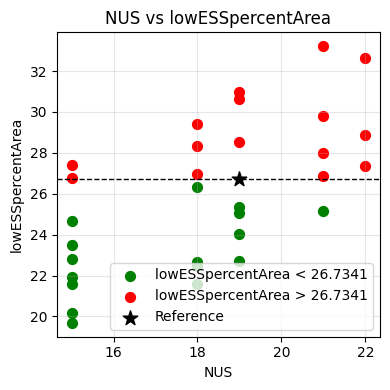

In [24]:
plot_scatter_2d ('NUS', 'lowESSpercentArea')

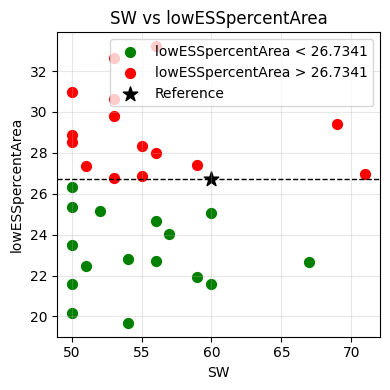

In [25]:
plot_scatter_2d ('SW', 'lowESSpercentArea')

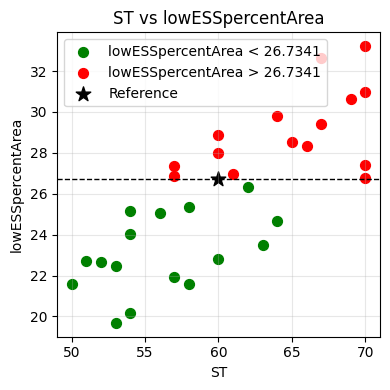

In [26]:
plot_scatter_2d ('ST', 'lowESSpercentArea')

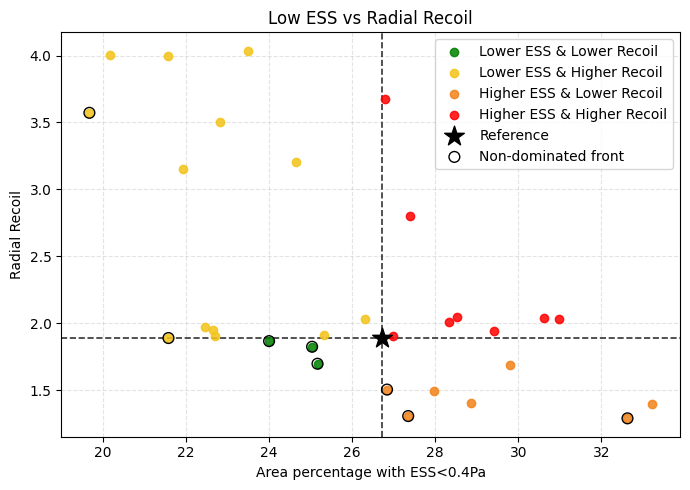

In [29]:
# --- Reference values ---
ref_lowESS = df_ref['lowESSpercentArea'].iloc[0]
ref_recoil = df_ref['RadialRecoil'].iloc[0]

# Optional offset on ESS threshold (your original had +0.5)
delta_ess = 0.0
ess_thresh = ref_lowESS + delta_ess
recoil_thresh = ref_recoil  # no offset for recoil per your example

# --- Build masks (strictly "lower" uses <; change to <= if you want to include equals) ---
mask_lower_ess   = df1['lowESSpercentArea'] < ess_thresh
mask_lower_recoil = df1['RadialRecoil'] < recoil_thresh

# Quadrants:
mask_green  =  mask_lower_ess  &  mask_lower_recoil                                  # lower ESS, lower recoil
mask_yellow =  mask_lower_ess  & (~mask_lower_recoil)                                # lower ESS, higher/equal recoil
mask_orange = (~mask_lower_ess) &  mask_lower_recoil                                 # higher/equal ESS, lower recoil
mask_red    = (~mask_lower_ess) & (~mask_lower_recoil)                               # higher/equal ESS, higher/equal recoil

plt.figure(figsize=(7, 5))

# --- Plot each group ---
plt.scatter(df1.loc[mask_green,  'lowESSpercentArea'], df1.loc[mask_green,  'RadialRecoil'],
            color='green',  label='Lower ESS & Lower Recoil', alpha=0.85, zorder=3)
plt.scatter(df1.loc[mask_yellow, 'lowESSpercentArea'], df1.loc[mask_yellow, 'RadialRecoil'],
            color="#F3C419", label='Lower ESS & Higher Recoil', alpha=0.85, zorder=3)
plt.scatter(df1.loc[mask_orange, 'lowESSpercentArea'], df1.loc[mask_orange, 'RadialRecoil'],
            color="#F38219", label='Higher ESS & Lower Recoil', alpha=0.85, zorder=3)
plt.scatter(df1.loc[mask_red,    'lowESSpercentArea'], df1.loc[mask_red,    'RadialRecoil'],
            color='red',    label='Higher ESS & Higher Recoil', alpha=0.85, zorder=3)

# --- Reference point as black star ---
plt.scatter(ref_lowESS, ref_recoil, color='black', marker='*', s=220,
            edgecolor='black', label='Reference', zorder=4)

# --- Threshold lines (at adjusted ESS & reference recoil) ---
plt.axvline(x=ess_thresh,   color='black', linestyle='--', linewidth=1.2, alpha=0.8, zorder=2)
plt.axhline(y=recoil_thresh, color='black', linestyle='--', linewidth=1.2, alpha=0.8, zorder=2)

# --- Optional annotations for thresholds ---
"""ax = plt.gca()
ylim = ax.get_ylim()
xlim = ax.get_xlim()
plt.text(ess_thresh, ylim[1], f'ESS thr = {ess_thresh:.3f}',
         ha='right', va='top', fontsize=9, color='black', rotation=90)
plt.text(xlim[1], recoil_thresh, f'Recoil thr = {recoil_thresh:.3f}',
         ha='right', va='bottom', fontsize=9, color='black')"""


# Sort by ESS ascending, then keep points whose recoil is strictly decreasing as ESS increases.
df_sorted = df1[['lowESSpercentArea', 'RadialRecoil']].copy()
df_sorted = df_sorted.sort_values(by=['lowESSpercentArea', 'RadialRecoil'], ascending=[True, True])

# Walk through and keep points that set a new minimum on recoil
nondom_idx = []
best_recoil = np.inf
for idx, row in df_sorted.iterrows():
    recoil = row['RadialRecoil']
    # Strictly better in recoil than any we've kept so far (for minimization)
    if recoil < best_recoil:
        nondom_idx.append(idx)
        best_recoil = recoil

df_nondom = df1.loc[nondom_idx]

# Overlay nondominated points as black circles (unfilled)
plt.scatter(df_nondom['lowESSpercentArea'], df_nondom['RadialRecoil'],
            facecolors='none', edgecolors='black', s=60, linewidths=1,
            label='Non-dominated front', zorder=5)


# --- Cosmetics ---
plt.xlabel('Area percentage with ESS<0.4Pa')
plt.ylabel('Radial Recoil')
plt.title('Low ESS vs Radial Recoil')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

In [ ]:

# Filter rows where both conditions are true
ref_lowESS = df_ref['lowESSpercentArea'].iloc[0]
ref_recoil = df_ref['RadialRecoil'].iloc[0]

df_opt = df1[(df1['lowESSpercentArea'] < ref_lowESS+0.5) & (df1['RadialRecoil'] < ref_recoil)]
df_merge = pd.concat([df_opt, df_ref], axis=0) 
df_merge


# Checking correlation between design variables and outputs

In [ ]:
def correlation_finder(cols):

    Z = StandardScaler().fit_transform(df1[cols].dropna())
    corr = df1[cols].corr(method='pearson')  # or 'spearman' if non-linear / monotonic
    print('Correlation coefficients')
    print(corr[[cols[-1]]].loc[['NUS', 'SW', 'ST']])


    Z = StandardScaler().fit_transform(df1[cols].dropna())

    pca = PCA(n_components=3).fit(Z)
    loadings = pd.DataFrame(pca.components_.T, index=cols,
                            columns=[f'PC{i+1}' for i in range(3)])
    explained = pca.explained_variance_ratio_
    print('\nPCA based approach')
    print(f'Explained variance ratio:\nNUS: {explained[0]}\nSW: {explained[1]}\nST: {explained[2]}')


In [ ]:
cols_RR = ['NUS','SW', 'ST', 'RadialRecoil']
correlation_finder(cols_RR)

In [ ]:
cols_ESS = ['NUS','SW', 'ST', 'lowESSpercentArea']
correlation_finder(cols_ESS)